<a href="https://colab.research.google.com/github/lordnixus/lord-of-the-rings/blob/main/extracting_relationships.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# import english language model for spacy
!python3 -m spacy download en_core_web_sm

2023-04-10 05:27:22.772108: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 63.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# load english language model
# create Named Entity Recgonition (NER)
NER = spacy.load('en_core_web_sm')

In [ ]:
import os
from google.colab import drive
# get all books in the file directory

source_dir = "/lotr"
all_books = [b for b in os.scandir(source_dir) if ".txt" in b.name]

In [ ]:
all_books

[<DirEntry '02 - The Two Towers.txt'>,
 <DirEntry '01 - The Fellowship Of The Ring.txt'>,
 <DirEntry '03 - The Return Of The King.txt'>]

In [ ]:
!pip install nlp
import nlp

nlp.max_length = 1050000
max_chunk_length = 1050000  # set the maximum length for each chunk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
book = all_books[1]

In [ ]:
with open(book, encoding='unicode_escape') as f:
    # read the text from the file in chunks and process each chunk separately
    while True:
        chunk = f.read(max_chunk_length)
        if not chunk:
            break  # stop if end of file is reached
        book_doc = NER(chunk)
        # do something with the parsed document

In [ ]:
# visualize identified entities

displacy.render(book_doc[0:2000], style="ent", jupyter = True)

In [16]:
# load character names
character_df = pd.read_csv("/lotr/lotr_characters.csv")

In [17]:
# remove brackets and text within brackets
import re
character_df["character"] = character_df["character"].apply(lambda x: re.sub(" [\(].*?[\)]", "", x))
character_df["character_firstname"] = character_df["character"].apply(lambda x: x.split(" ", 1)[0])

In [18]:
pd.set_option("display.max_rows", None)
character_df

,chapter,character,character_firstname
0,Category:CGI characters,Beechbone,Beechbone
1,Category:CGI characters,Bregalad,Bregalad
2,Category:CGI characters,Durin's Bane,Durin's
3,Category:CGI characters,Finglas,Finglas
4,Category:CGI characters,Fladrif,Fladrif
5,Category:CGI characters,Gollum,Gollum
6,Category:CGI characters,Great Goblin,Great
7,Category:CGI characters,Lindenroot,Lindenroot
8,Category:CGI characters,Category:Non-canonical Creatures,Category:Non-canonical
9,Category:CGI characters,Category:Non-canonical Ents,Category:Non-canonical


In [19]:
# get named entity list per sentence

sent_entity_df = []

# loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
  entity_list = [ent.text for ent in sent.ents]
  sent_entity_df.append ({"sentence": sent, "entities": entity_list})

sent_entity_df = pd.DataFrame(sent_entity_df)

In [20]:
sent_entity_df

,sentence,entities
0,"(ves, they, may, be, right, .)",[]
1,"(These, elves, and, half, -, elves, and, wizar...",[half]
2,"(Yet, often, I, doubt, if, they, are, wise, an...",[]
3,"(But, each, to, his, own, kind, .)",[]
4,"(True, -, hearted, Men, ,, they, will, not, be...",[]
5,"(We, of, Minas, Tirith, have, been, staunch, t...",[Minas Tirith]
6,"(We, do, not, desire, the, power, of, wizard, ...",[]
7,"(And, behold, !)",[]
8,"(in, our, need, chance, brings, to, light, the...",[]
9,"(It, is, a, gift, ,, I, say, ;, a, gift, to, t...",[Mordor]


In [21]:
# function to filter out non-character entities

def filter_entity(ent_list, character_df):
  return [ent for ent in ent_list
          if ent in list(character_df.character)
          or ent in list(character_df.character_firstname)]

In [23]:
filter_entity(["Aragorn", "Nixus", "Frodo", "2", "Alexander"], character_df)

['Aragorn', 'Frodo']

In [27]:
sent_entity_df["character_entities"] = sent_entity_df["entities"].apply(lambda x: filter_entity(x, character_df))

# filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df["character_entities"].map(len) > 0]
sent_entity_df_filtered.head(20)

,sentence,entities,character_entities
9,"(It, is, a, gift, ,, I, say, ;, a, gift, to, t...",[Mordor],[Mordor]
14,"(Or, if, he, refuses, ,, why, not, Boromir, ?)",[Boromir],[Boromir]
16,"(How, I, would, drive, the, hosts, of, Mordor,...",[Mordor],[Mordor]
17,"(Boromir, strode, up, and, down, ,, speaking, ...","[Boromir, Mordor]","[Boromir, Mordor]"
24,"(The, only, plan, that, is, proposed, to, us, ...","[Mordor, Enemy]",[Mordor]
29,"(But, is, it, not, really, your, good, sense, ...",[Frodo],[Frodo]
35,"(cried, Boromir, .)",[Boromir],[Boromir]
37,"(`, You, misunderstand, me, ,, ', said, Frodo,...",[Frodo],[Frodo]
39,"(Boromir, persisted, .)",[Boromir],[Boromir]
40,"(', My, city, is, not, far, now, ;, and, it, i...",[Mordor],[Mordor]


In [29]:
# take only the first name of the characters

sent_entity_df_filtered["character_entities"] = sent_entity_df_filtered["character_entities"].apply(lambda x: [item.split()[0] for item in x])

<ipython-input-29-d5a476801b91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered["character_entities"] = sent_entity_df_filtered["character_entities"].apply(lambda x: [item.split()[0] for item in x])


In [30]:
pd.reset_option("^display.", silent=True)
sent_entity_df_filtered

,sentence,entities,character_entities
9,"(It, is, a, gift, ,, I, say, ;, a, gift, to, t...",[Mordor],[Mordor]
14,"(Or, if, he, refuses, ,, why, not, Boromir, ?)",[Boromir],[Boromir]
16,"(How, I, would, drive, the, hosts, of, Mordor,...",[Mordor],[Mordor]
17,"(Boromir, strode, up, and, down, ,, speaking, ...","[Boromir, Mordor]","[Boromir, Mordor]"
24,"(The, only, plan, that, is, proposed, to, us, ...","[Mordor, Enemy]",[Mordor]
...,...,...,...
438,"(`, Now, ,, Sam, ,, ', said, Frodo, ,, `, do, ...","[Sam, Frodo]",[Frodo]
459,"(He, rushed, to, the, camping, place, ,, fishe...",[Frodo],[Frodo]
461,"(said, Frodo, .)",[Frodo],[Frodo]
473,"(So, Frodo, and, Sam, set, off, on, the, last,...","[Frodo, Sam, Quest]",[Frodo]


In [32]:
# create relationships

window_size = 5
relationships = []

for i in range (sent_entity_df_filtered.index[-1]):
  end_i = min(i+5, sent_entity_df_filtered.index[-1])
  char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])

  # remove duplicated characters that are next to each other
  char_unique = [char_list[i] for i in range(len(char_list))
                if (i==0) or char_list[i] != char_list[i-1]]

  if len(char_unique) > 1:
    for idx, a in enumerate(char_unique[:-1]):
      b = char_unique[idx + 1]
      relationships.append({"source": a, "target": b})

In [33]:
relationship_df = pd.DataFrame(relationships)

In [34]:
pd.set_option("display.max_rows", None)
relationship_df

,source,target
0,Mordor,Boromir
1,Boromir,Mordor
2,Boromir,Mordor
3,Mordor,Boromir
4,Boromir,Mordor
5,Boromir,Mordor
6,Mordor,Boromir
7,Boromir,Mordor
8,Boromir,Mordor
9,Mordor,Boromir


In [35]:
# sort the cases with a -> b and b -> a

relationship_df = pd.DataFrame (np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)

In [36]:
relationship_df

,source,target
0,Boromir,Mordor
1,Boromir,Mordor
2,Boromir,Mordor
3,Boromir,Mordor
4,Boromir,Mordor
5,Boromir,Mordor
6,Boromir,Mordor
7,Boromir,Mordor
8,Boromir,Mordor
9,Boromir,Mordor


In [37]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source", "target"], sort=False, as_index=False).sum()

In [38]:
relationship_df.head(10)

,source,target,value
0,Boromir,Mordor,21
1,Frodo,Mordor,15
2,Boromir,Frodo,25
3,Frodo,Gollum,3
4,Frodo,Gandalf,4
5,Gandalf,Legolas,4
6,Frodo,Legolas,9
7,Frodo,Gimli,6
8,Boromir,Gimli,5
9,Boromir,Legolas,6


In [39]:
# create a graph from pandas 
G = nx.from_pandas_edgelist(relationship_df,
                            source = "source",
                            target = "target",
                            edge_attr = "value",
                            create_using = nx.Graph())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


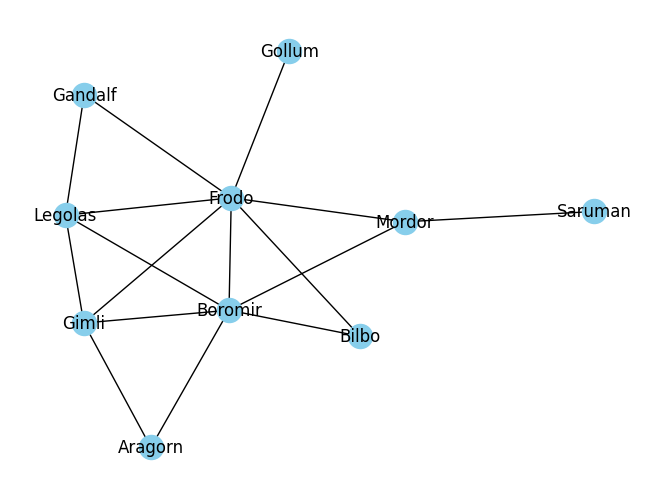

In [40]:
# graph visualisation networkx

!pip install scipy

pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = "skyblue", edge_cmap = plt.cm.Blues, pos = pos)
plt.show()

In [42]:
# graph visualisation - pyvis
!pip install pyvis
from pyvis.network import Network
net = Network(notebook = True, width = "1000px", height = "700px", bgcolor = "#222222", font_color = "white")

net.from_nx(G)
net.show("lotr.html")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.7 MB/s eta 0:00:00
lotr.html


In [43]:
!pip install pyvis
from pyvis.network import Network
import os
import time

net = Network(notebook=True, width='1000px', height='700px', bgcolor='#222222', font_color='white')
net.from_nx(G)
net.save_graph('lotr.html')
time.sleep(1) # give time for file to be written to disk
os.chdir('./')
!ls -lh # verify that the file is there and has non-zero size
from google.colab import files
files.view('lotr.html')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
total 16K
drwxr-xr-x 5 root root 4.0K Apr 10 08:16 lib
-rw-r--r-- 1 root root 6.3K Apr 10 08:31 lotr.html
drwxr-xr-x 1 root root 4.0K Apr  6 13:39 sample_data


<IPython.core.display.Javascript object>

In [47]:
!pip install pyvis
from pyvis.network import Network
import os
import time

net = Network(notebook=True, width='1000px', height='700px', bgcolor='#222222', font_color='white')
net.from_nx(G)
net.save_graph('lotr.html')
time.sleep(1) # give time for file to be written to disk
os.chdir('./')
if os.path.exists('lotr.html'):
    print('lotr.html exists')
else:
    print('lotr.html does not exist')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
lotr.html exists


In [54]:
!pip install pyvis
from pyvis.network import Network

net = Network(notebook=True, width='1000px', height='700px', bgcolor='#222222', font_color='white', cdn_resources='in_line')
net.from_nx(G)
net.show('lotr.html', port=8080, timeout=60)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


TypeError: ignored

In [55]:
port = net.get_server_port()


AttributeError: ignored

In [61]:
net = Network(notebook=False, width='1000px', height='700px', bgcolor='#222222', font_color='white')
node_degree = dict(G.degree)

In [62]:
net.from_nx(G)
net.show_buttons()
net.save_graph("lotr.html")

In [63]:
dict(G.degree)

{'Boromir': 6,
 'Mordor': 3,
 'Frodo': 7,
 'Gollum': 1,
 'Gandalf': 2,
 'Legolas': 4,
 'Gimli': 4,
 'Aragorn': 2,
 'Bilbo': 2,
 'Saruman': 1}

In [64]:
nx.set_node_attributes(G, node_degree, "size")

In [59]:
import os
print(os.getcwd())


/content
